<a href="https://colab.research.google.com/github/Randhir123/iisc-cds/blob/main/Randhir_M4_NB_MiniProject_1_Image_Classification_MLP.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Advanced Certification Program in Computational Data Science

##  A program by IISc and TalentSprint

### Mini Project Notebook: Image Classification using Multi Layer Perceptron

## Learning Objectives

At the end of the experiment, you will be able to :

* load and extract features of images

* implement the Multi-Layer perceptron to classify images

* implement simple neural network from keras

## Introduction

Traffic sign recognition is a challenging, real-world problem relevant for AI based transportation systems. Traffic signs show a wide range of variations between classes in terms of color, shape, and the presence of pictograms or text. However, there exist subsets of
classes (e.g., speed limit signs) that are very similar to each other. Further, the classifier
has to be robust against large variations in visual appearances due to changes in illumination, partial
occlusions, rotations, weather conditions etc. Using a comprehensive traffic sign detection dataset, here we will perform classification of traffic signs, train and evaluate the different models and compare to the performance of MLPs.

![img](https://paperswithcode.com/media/datasets/GTSRB-0000000633-9ce3c5f6_Dki5Rsf.jpg)

## Dataset

The data for this mini-project is from the German Traffic Sign Detection Benchmark [GTSDB](https://benchmark.ini.rub.de/gtsdb_dataset.html). This archive contains the training set used during the IJCNN 2013 competition.

The German Traffic Sign Detection Benchmark is a single-image detection assessment for researchers with interest in the field of computer vision, pattern recognition and image-based driver assistance. It is introduced on the IEEE International Joint Conference on Neural Networks 2013.

It features ...

* The main archive FullIJCNN2013.zip includes the images (1360 x 800 pixels) in PPM format, the image sections containing only the traffic signs
* A file in CSV format with the ground truth
* A ReadMe.txt with more details.

Note that we will be using the images inside the image sections subfolders, containing only the traffic signs.

## Problem Statement

To build and improve upon a machine learning model for the classification of images and achieve a high accuracy final model.

## Grading = 10 Points

In [3]:
#@title Download the data
!wget -qq https://sid.erda.dk/public/archives/ff17dc924eba88d5d01a807357d6614c/FullIJCNN2013.zip
!unzip -qq FullIJCNN2013.zip

### Import Required packages

In [4]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from sklearn.neural_network import MLPClassifier
from skimage.io import imread, imshow
from sklearn import preprocessing
from sklearn.preprocessing import normalize
from sklearn import metrics
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
import seaborn as sns
import os, glob
from PIL import Image
from sklearn.model_selection import GridSearchCV
from keras.callbacks import EarlyStopping
# Keras
import tensorflow as tf
from tensorflow import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout, BatchNormalization, Activation
from tensorflow.keras.losses import SparseCategoricalCrossentropy
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.utils import to_categorical

### Data Loading and Feature Extraction (2 points)

#### Get the features and labels of data

* Extract the features of the images within image sections only (do not use images located outside these folders)
* Extract labels of the images
* Resize the images to (30, 30) and convert to numpy 1-D array

   Hint: [Link](https://machinelearningmastery.com/how-to-load-and-manipulate-images-for-deep-learning-in-python-with-pil-pillow/)

In [5]:
def rgb2gray(rgb):
    return np.dot(rgb[...,:3], [0.2989, 0.5870, 0.1140])

def read_images(path_folder):
    """ Read all the folder (images)
        Preprocess images - resize (30x30)
        return images and classes
    """

    img_data=[]
    X = []
    Y = []

    for name in os.listdir(path_folder):
        # Classes are represented by folders
        if os.path.isdir(os.path.join(path_folder, name)):
            idclass=int(name)
            path_class=os.path.join(path_folder, name)
            #read files (.ppm) for every folder
            for file in os.listdir(path_class):
                if os.path.isfile(os.path.join(path_class, file)):
                    img = Image.open(os.path.join(path_class, file))
                    img = img.resize((30, 30))
                    img_array=np.array(img)
                    img_data.append(img_array)
                    gray = rgb2gray(img_array)
                    gray = gray.flatten()
                    X.append(gray)
                    Y.append(idclass)
    return np.array(img_data), np.array(X), np.array(Y)

path = "/content/FullIJCNN2013/"
img_data, X, y = read_images(path)


In [20]:
img_data.shape, X.shape, y.shape

((1213, 30, 30, 3), (1213, 900), (1213,))

### Data Exploration and Preprocessing ( 2 points)

#### Plot the sample image of each class

Hint: plt.subplot

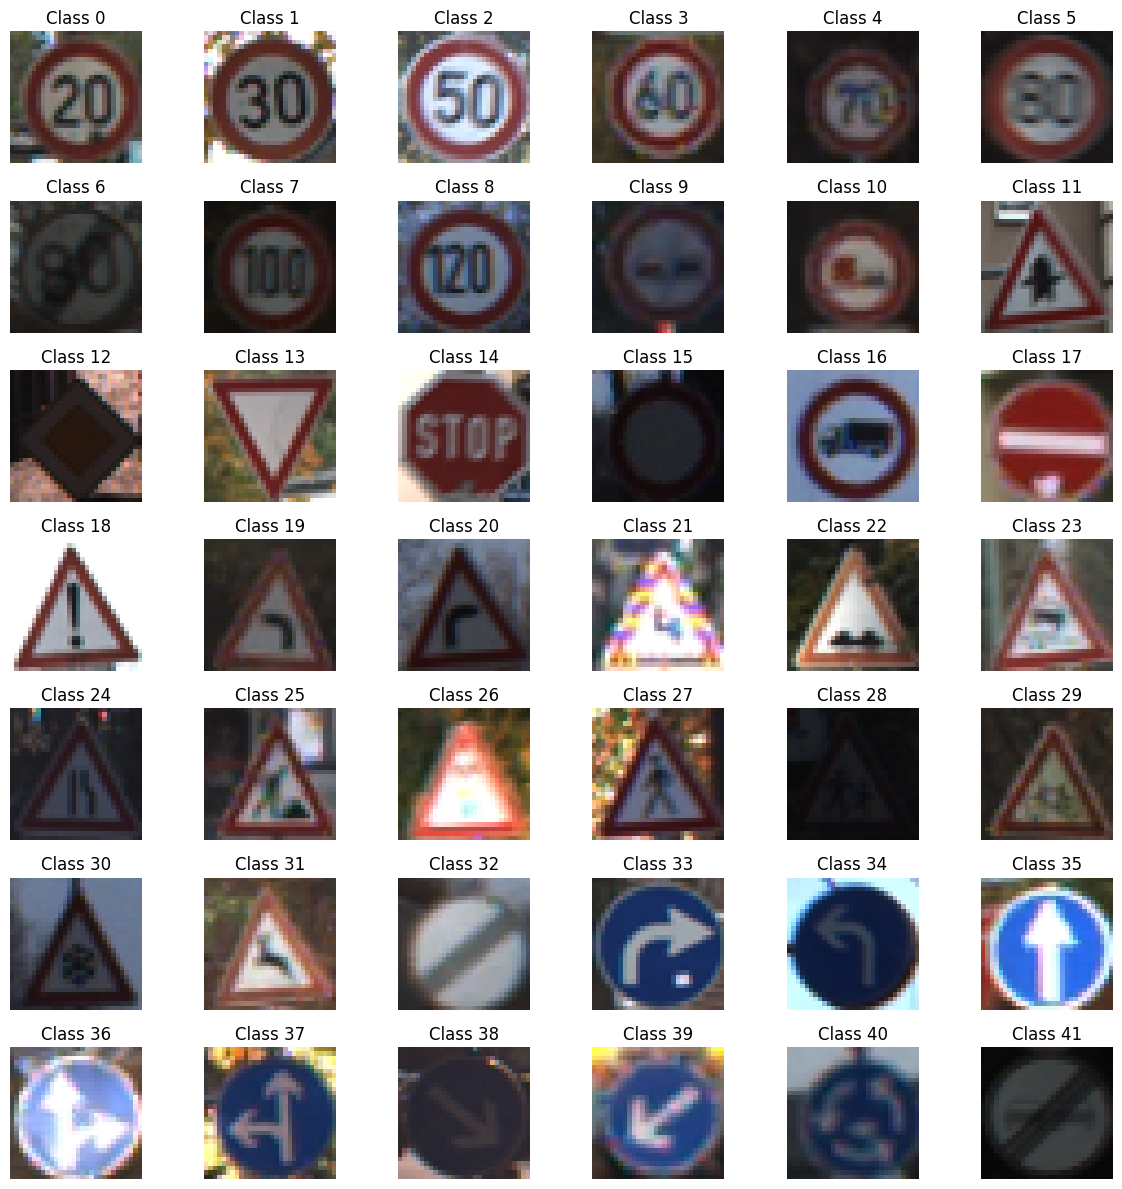

In [ ]:
num_classes = 42
num_rows = 7
num_cols = 6

fig, axes = plt.subplots(num_rows, num_cols, figsize=(12, 12))

for i in range(num_classes):
    sample_image = img_data[np.where(y == i)[0][0]]

    row = i // num_cols
    col = i % num_cols
    axes[row, col].imshow(sample_image)
    axes[row, col].set_title(f"Class {i}")
    axes[row, col].axis('off')

plt.tight_layout()
plt.show()


#### Plot the distribution of Classes

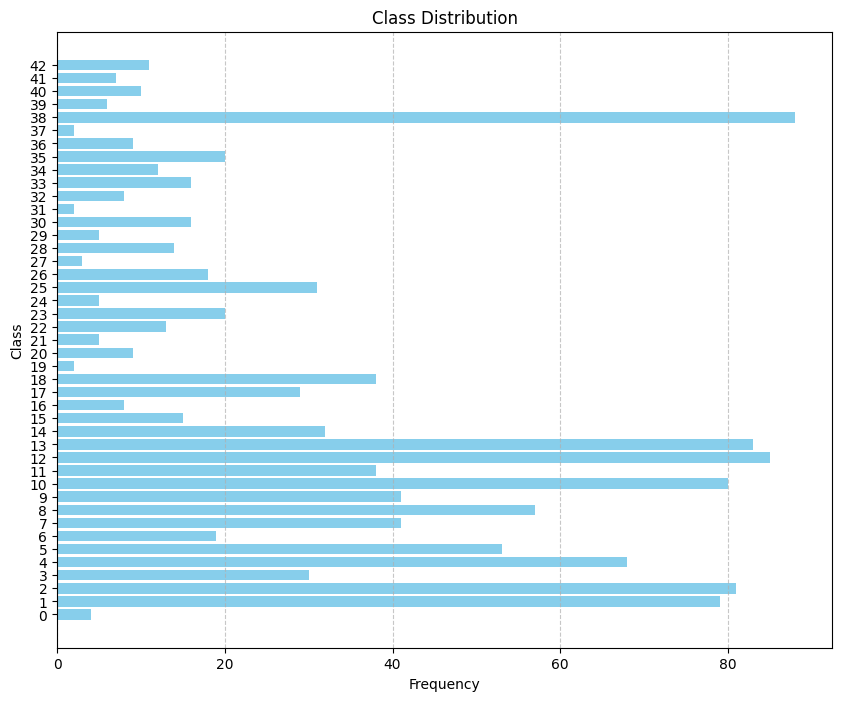

In [ ]:
unique_classes, class_counts = np.unique(y, return_counts=True)

plt.figure(figsize=(10, 8))
plt.barh(unique_classes, class_counts, color='skyblue')
plt.xlabel('Frequency')
plt.ylabel('Class')
plt.title('Class Distribution')
plt.yticks(unique_classes)
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.show()

#### Normalize the features

For most image data, the pixel values are integers with values between 0 and 255.

Neural networks process inputs using small weight values, and inputs with large integer values can disrupt or slow down the learning process. As such it is good practice to normalize the pixel values.

Hint: sklearn.preprocessing.normalize

In [6]:
X_normalized = normalize(X, axis=0)

### Train the MLP classifier on features (1 point)

* Split the data into train and test

* Train the MLP classifier with different parameters

* Get the accuracy score and performance metrics

In [7]:
test_size = 0.2

X_train, X_test, y_train, y_test = train_test_split(
    X_normalized, y, test_size=test_size
)

In [8]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((970, 900), (243, 900), (970,), (243,))

In [ ]:
model = MLPClassifier()
model.fit(X_train, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


MLPClassifier()

In [ ]:
accuracy = model.score(X_test, y_test)
print("Test accuracy:", accuracy)

Test accuracy: 0.6172839506172839


### Tune the hyper-parameters (2 points)

* Use the GridSearchCV or RandomizedSearchCV and select best parameters

  Hint: [GridSearchCV](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html), [RandomizedSearchCV](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.RandomizedSearchCV.html)

  (or)
* Manually change and find the best parameters

To know about all the parameters, click [here](https://scikit-learn.org/stable/modules/generated/sklearn.neural_network.MLPClassifier.html)

In [ ]:
param_grid = {
    'hidden_layer_sizes': [(2048,), (2048, 1024), (2048, 1024, 512)],
    'activation': ['relu', 'tanh', 'logistic'],
    'solver': ['sgd', 'adam'],
    'alpha': [0.0001, 0.001]
}

model = MLPClassifier(max_iter=100)

grid_search = GridSearchCV(model, param_grid, cv=3, scoring='accuracy', verbose=1)
grid_search.fit(X_train, y_train)

print("Best parameters:", grid_search.best_params_)

accuracy = grid_search.best_estimator_.score(X_test, y_test)
print("Test accuracy:", accuracy)

/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=3.
  warnings.warn(


Fitting 3 folds for each of 36 candidates, totalling 108 fits


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptro

Best parameters: {'activation': 'tanh', 'alpha': 0.0001, 'hidden_layer_sizes': (2048, 1024), 'solver': 'adam'}
Test accuracy: 0.8436213991769548


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


```
Best parameters: {'activation': 'tanh', 'alpha': 0.0001, 'hidden_layer_sizes': (2048, 1024), 'solver': 'adam'}
Test accuracy: 0.8436213991769548
```

#### Try the different algorithms and compare the results with MLP classifier

In [10]:
import xgboost as xgb

from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
y_train = le.fit_transform(y_train)
y_test = le.fit_transform(y_test)

param_grid = {
    'learning_rate': [0.1, 0.01],
    'max_depth': [3, 5],
    'n_estimators': [50, 100],
    'objective': ['multi:softmax'],  # for multi-class classification
}

xgb_classifier = xgb.XGBClassifier()

# Perform grid search
grid_search = GridSearchCV(xgb_classifier, param_grid, cv=3, scoring='accuracy', verbose=1)
grid_search.fit(X_train, y_train)

# Print the best hyperparameters found
print("Best parameters:", grid_search.best_params_)

# Evaluate the model on the test set
accuracy = grid_search.best_estimator_.score(X_test, y_test)
print("Test accuracy:", accuracy)

Fitting 3 folds for each of 8 candidates, totalling 24 fits


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=3.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:378: FitFailedWarning: 
16 fits failed out of a total of 24.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
8 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.10/dist-packages/xgboost/core.py", line 730, in inner_f
    return func(**kwargs)
  File "/usr/

Best parameters: {'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 50, 'objective': 'multi:softmax'}
Test accuracy: 0.48148148148148145


```
Best parameters: {'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 50, 'objective': 'multi:softmax'}
Test accuracy: 0.48148148148148145
```

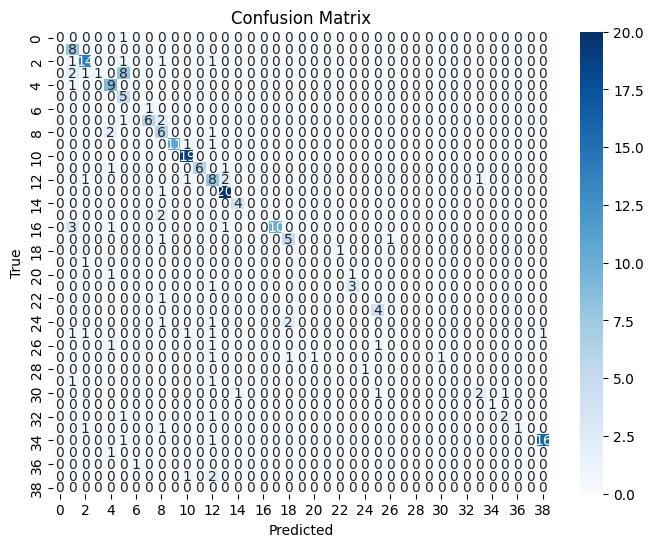

In [12]:
y_pred = grid_search.best_estimator_.predict(X_test)

cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

### Implement simple Neural Networks using keras (3 points)

* Define the keras model and initialize the layers
  - Ensure the input layer has the right number of input features. This can be specified when creating the first layer with the input_dim argument.
* Compile the model
  - Specify the loss function (to evaluate a set of weights), the optimizer (is used to search through different weights for the network) and any optional metrics to collect and report during training.
* Fit and Evaluate the model
  - Fit the data by specifying epochs and evaluate the model

In [23]:
print(tf.__version__)

2.15.0


In [24]:
X_train.shape

(970, 900)

In [47]:
# Define your model architecture
def create_model(input_shape, num_classes):
    model = Sequential([
        Dense(1024, input_shape=input_shape, activation='relu'),
        Dropout(0.2),
        Dense(512, activation='relu'),
        Dropout(0.2),
        Dense(num_classes, activation='softmax')
    ])
    return model

# Define model parameters
input_shape = X_train.shape[1:]
num_classes = len(set(y_train))

# Create the model
model = create_model(input_shape, num_classes)

# Compile the model
model.compile(optimizer=Adam(),
              loss=SparseCategoricalCrossentropy(),
              metrics=['accuracy'])

es = EarlyStopping(
  monitor="val_loss", mode="min", verbose=0, patience=5, restore_best_weights=True
)

# Train the model
history = model.fit(X_train, y_train, epochs=200, batch_size=32, validation_data=(X_test, y_test))

# Evaluate the model
test_loss, test_accuracy = model.evaluate(X_test, y_test)
print(f"Test Accuracy: {test_accuracy}")

Epoch 1/200
31/31 [==============================] - 2s 28ms/step - loss: 3.4846 - accuracy: 0.0794 - val_loss: 3.4818 - val_accuracy: 0.1029
Epoch 2/200
31/31 [==============================] - 1s 41ms/step - loss: 3.3161 - accuracy: 0.1268 - val_loss: 3.3222 - val_accuracy: 0.1317
Epoch 3/200
31/31 [==============================] - 1s 48ms/step - loss: 3.0974 - accuracy: 0.2155 - val_loss: 3.0794 - val_accuracy: 0.2058
Epoch 4/200
31/31 [==============================] - 2s 68ms/step - loss: 2.8392 - accuracy: 0.2464 - val_loss: 2.8294 - val_accuracy: 0.2634
Epoch 5/200
31/31 [==============================] - 2s 66ms/step - loss: 2.5521 - accuracy: 0.3124 - val_loss: 2.5445 - val_accuracy: 0.2922
Epoch 6/200
31/31 [==============================] - 2s 79ms/step - loss: 2.3204 - accuracy: 0.3557 - val_loss: 2.3986 - val_accuracy: 0.3169
Epoch 7/200
31/31 [==============================] - 2s 72ms/step - loss: 2.1326 - accuracy: 0.3928 - val_loss: 2.2215 - val_accuracy: 0.3457
Epoch 

```
Epoch 200/200
31/31 [==============================] - 1s 32ms/step - loss: 0.0252 - accuracy: 0.9938 - val_loss: 1.4555 - val_accuracy: 0.8230
8/8 [==============================] - 0s 12ms/step - loss: 1.4555 - accuracy: 0.8230
Test Accuracy: 0.8230452537536621
```

#### Try the same parameters used for MLP Classifier and build the keras model

In [46]:
# Define your model architecture
def create_model(input_shape, num_classes):
    model = Sequential([
        Dense(100, input_shape=input_shape, activation='relu'),
        Dense(num_classes, activation='softmax')
    ])
    return model

# Define model parameters
input_shape = X_train.shape[1:]
num_classes = len(set(y_train))

# Create the model
model = create_model(input_shape, num_classes)

# Compile the model
model.compile(optimizer=Adam(),
              loss=SparseCategoricalCrossentropy(),
              metrics=['accuracy'])

# Train the model
history = model.fit(X_train, y_train, epochs=200, batch_size=32, validation_data=(X_test, y_test))

# Evaluate the model
test_loss, test_accuracy = model.evaluate(X_test, y_test)
print(f"Test Accuracy: {test_accuracy}")

Epoch 1/200
31/31 [==============================] - 1s 10ms/step - loss: 3.6083 - accuracy: 0.0660 - val_loss: 3.4687 - val_accuracy: 0.0535
Epoch 2/200
31/31 [==============================] - 0s 5ms/step - loss: 3.4011 - accuracy: 0.0969 - val_loss: 3.4243 - val_accuracy: 0.0823
Epoch 3/200
31/31 [==============================] - 0s 5ms/step - loss: 3.3315 - accuracy: 0.1247 - val_loss: 3.3985 - val_accuracy: 0.1728
Epoch 4/200
31/31 [==============================] - 0s 5ms/step - loss: 3.2853 - accuracy: 0.1660 - val_loss: 3.3742 - val_accuracy: 0.1605
Epoch 5/200
31/31 [==============================] - 0s 6ms/step - loss: 3.2448 - accuracy: 0.1948 - val_loss: 3.3449 - val_accuracy: 0.1852
Epoch 6/200
31/31 [==============================] - 0s 5ms/step - loss: 3.1973 - accuracy: 0.2423 - val_loss: 3.3098 - val_accuracy: 0.1811
Epoch 7/200
31/31 [==============================] - 0s 5ms/step - loss: 3.1481 - accuracy: 0.2227 - val_loss: 3.2544 - val_accuracy: 0.2428
Epoch 8/200


```
Epoch 200/200
31/31 [==============================] - 0s 5ms/step - loss: 0.3350 - accuracy: 0.9474 - val_loss: 1.0204 - val_accuracy: 0.7531
8/8 [==============================] - 0s 3ms/step - loss: 1.0204 - accuracy: 0.7531
Test Accuracy: 0.7530864477157593
```

#### Experiment using Dropout, Regularization and Batch Normalization

In [9]:
# Define your model architecture

def create_model(input_shape, num_classes):
    model = Sequential([
        Dense(1024, input_shape=input_shape),
        BatchNormalization(),  # Apply batch normalization
        Activation('relu'),
        Dropout(0.2),
        Dense(512),
        BatchNormalization(),  # Apply batch normalization
        Activation('relu'),
        Dropout(0.2),
        Dense(num_classes, activation='softmax')
    ])
    return model

# Define model parameters
input_shape = X_train.shape[1:]
num_classes = len(set(y_train))

# Create the model
model = create_model(input_shape, num_classes)

# Compile the model
model.compile(optimizer=Adam(),
              loss=SparseCategoricalCrossentropy(),
              metrics=['accuracy'])

es = EarlyStopping(
  monitor="val_loss", mode="min", verbose=0, patience=5, restore_best_weights=True
)

# Train the model
history = model.fit(X_train, y_train, epochs=200, batch_size=32, validation_data=(X_test, y_test))

# Evaluate the model
test_loss, test_accuracy = model.evaluate(X_test, y_test)
print(f"Test Accuracy: {test_accuracy}")

Epoch 1/200
31/31 [==============================] - 6s 77ms/step - loss: 3.0044 - accuracy: 0.2629 - val_loss: 3.5493 - val_accuracy: 0.1893
Epoch 2/200
31/31 [==============================] - 2s 58ms/step - loss: 2.0385 - accuracy: 0.4588 - val_loss: 3.3698 - val_accuracy: 0.2222
Epoch 3/200
31/31 [==============================] - 2s 58ms/step - loss: 1.4757 - accuracy: 0.5876 - val_loss: 3.2865 - val_accuracy: 0.1605
Epoch 4/200
31/31 [==============================] - 1s 31ms/step - loss: 1.2464 - accuracy: 0.6309 - val_loss: 3.2160 - val_accuracy: 0.2263
Epoch 5/200
31/31 [==============================] - 1s 27ms/step - loss: 1.0082 - accuracy: 0.7206 - val_loss: 3.1891 - val_accuracy: 0.1029
Epoch 6/200
31/31 [==============================] - 1s 27ms/step - loss: 0.8324 - accuracy: 0.7639 - val_loss: 3.1939 - val_accuracy: 0.1111
Epoch 7/200
31/31 [==============================] - 1s 27ms/step - loss: 0.8429 - accuracy: 0.7742 - val_loss: 2.9830 - val_accuracy: 0.2099
Epoch 

```
Epoch 200/200
31/31 [==============================] - 2s 54ms/step - loss: 0.0710 - accuracy: 0.9742 - val_loss: 2.1594 - val_accuracy: 0.7325
8/8 [==============================] - 0s 21ms/step - loss: 2.1594 - accuracy: 0.7325
Test Accuracy: 0.7325102686882019
```

8/8 [==============================] - 0s 18ms/step


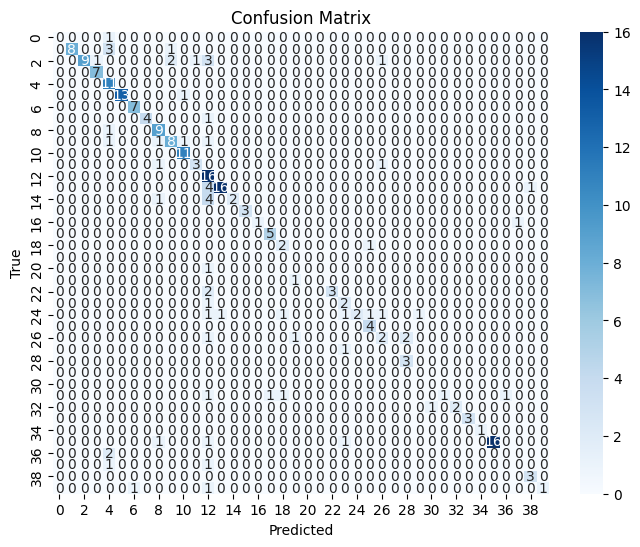


Classification Report:
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         1
           1       1.00      0.67      0.80        12
           2       1.00      0.53      0.69        17
           3       0.88      1.00      0.93         7
           4       0.55      1.00      0.71        11
           5       1.00      0.93      0.96        14
           6       0.88      1.00      0.93         7
           7       1.00      0.80      0.89         5
           8       0.69      0.90      0.78        10
           9       0.73      0.67      0.70        12
          10       0.85      1.00      0.92        11
          11       0.75      0.60      0.67         5
          12       0.41      1.00      0.58        16
          13       0.94      0.76      0.84        21
          14       1.00      0.29      0.44         7
          15       1.00      1.00      1.00         3
          16       1.00      0.50      0.67         2
   

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.

In [12]:
# Predict probabilities for each class for test set
y_pred_prob = model.predict(X_test)

# Convert probabilities to class labels
y_pred = np.argmax(y_pred_prob, axis=1)

cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

# Compute classification report
class_report = classification_report(y_test, y_pred)

# Print classification report
print("\nClassification Report:")
print(class_report)

### Report Analysis

* According to the confusion matrix, for which sign were the maximum misclassifications observed? Comment on the misclassification, owing to similar appearing traffic signs, if any.
* Comment on the performance of the MLP Classifier
* Discuss the optimal number of layers, activation functions, optimizers etc. that yielded the best accuracy
* Report on training time vs convergence

Reference: J. Stallkamp, M. Schlipsing, J. Salmen, and C. Igel. The German Traffic Sign Recognition Benchmark: A multi-class classification competition. In Proceedings of the IEEE International Joint Conference on Neural Networks, pages 1453–1460. 2011.